In [2]:
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [142]:
data = pd.read_csv('Data_Holland/mwl526_R.csv')
data = pd.DataFrame(data)
#data=pd.concat([data,data,data,data,data,data,data,data,data,data,data,data,data,data,data])
print(data.shape)
data.head()

(934, 14)


,Pmin,Pmax,Pavg,Pref,Pcmin,Pcavg,Pcmax,Amin,Aavg,Amax,Ramin,Ramax,Ravg,Rain
0,-48,-47,-47.5,-47.5,-48.0,-47.75,-47.5,0.0,0.25,0.5,2.0,1.5,1.75,0.03
1,-48,-47,-47.5,-47.5,-48.0,-47.75,-47.5,0.0,0.25,0.5,2.0,1.5,1.75,0.07
2,-48,-46,-47.0,-47.5,-48.0,-47.75,-47.5,0.0,0.25,0.5,2.0,1.5,1.75,0.03
3,-48,-47,-47.5,-47.5,-48.0,-47.75,-47.5,0.0,0.25,0.5,2.0,1.5,1.75,0.02
4,-48,-47,-47.5,-47.5,-48.0,-47.75,-47.5,0.0,0.25,0.5,2.0,1.5,1.75,0.03


Text(0, 0.5, 'Rain rate')

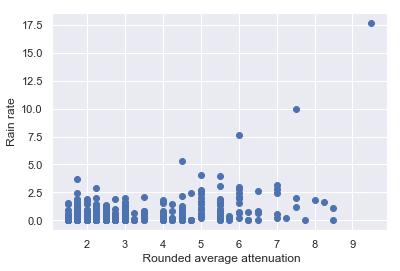

In [143]:
plt.scatter(data['Ravg'],data['Rain'])
plt.xlabel(' Rounded average attenuation')
plt.ylabel('Rain rate')

In [144]:
xpts=np.array(data['Ramin'])
ypts=np.array(data['Ravg'])
zpts=np.array(data['Ramax'])

apts=np.array(data['Pmin'])
bpts=np.array(data['Pavg'])
cpts=np.array(data['Pmax'])

X=np.vstack((xpts,ypts,zpts,apts,bpts,cpts))
X=X.T

y=np.array(data['Rain'])
y=np.vstack((y))
X.shape

(934, 6)

In [145]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)

RMSE value for k=  1 is: 0.5617186194943434
RMSE value for k=  2 is: 0.5360972555233603
RMSE value for k=  3 is: 0.5722803101772052
RMSE value for k=  4 is: 0.5403582132836529
RMSE value for k=  5 is: 0.5107761107316175
RMSE value for k=  6 is: 0.503717198478254
RMSE value for k=  7 is: 0.4816136161027227
RMSE value for k=  8 is: 0.48318202019429224
RMSE value for k=  9 is: 0.47931738697539666
RMSE value for k=  10 is: 0.4777211109978793
RMSE value for k=  11 is: 0.4721902216555787
RMSE value for k=  12 is: 0.4798659781145895
RMSE value for k=  13 is: 0.46867474862435404
RMSE value for k=  14 is: 0.46805701968536206
RMSE value for k=  15 is: 0.471704127937975
RMSE value for k=  16 is: 0.4696380224801766
RMSE value for k=  17 is: 0.4725098956270648
RMSE value for k=  18 is: 0.4658477610364419
RMSE value for k=  19 is: 0.47043996592109466
RMSE value for k=  20 is: 0.47263116901568575


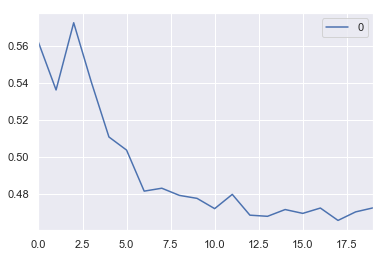

In [146]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)
    
    #plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [100]:
#predict = model.predict(X_test)

In [101]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

C:\Users\Evrad\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_neighbors': 15}

In [147]:
model = neighbors.KNeighborsRegressor(n_neighbors = 19)
#metric='euclidean'

In [148]:
model.fit(X_train, y_train)  #fit the model

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=19, p=2,
          weights='uniform')

In [149]:
 predict=model.predict(X_test)

In [150]:
print(np.mean(y_test))
print(np.mean(predict))

0.38465240641711224
0.36143540669856467


In [151]:
MSE = mean_squared_error(y_test , predict)
MAE = mean_absolute_error(y_test , predict)
print('MAE = ',MAE)
print('MSE = ',MSE)

MAE =  0.28928511117365613
MSE =  0.22131376153584073


In [152]:
np.corrcoef(y_test.T,predict.T)

array([[1.        , 0.62238641],
       [0.62238641, 1.        ]])

In [153]:
np.corrcoef(y.T,ypts.T)

array([[1.        , 0.46320761],
       [0.46320761, 1.        ]])

Text(0, 0.5, 'Predictions (rain rate)')

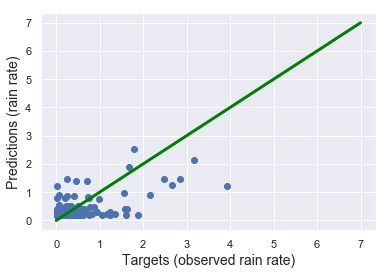

In [158]:
plt.scatter(y_test,predict)
#plt.plot(y_test,yhat_test)
ab=ordo=range(0,8)
fig=plt.plot(ab,ordo,lw=3,c='green')
plt.xlabel('Targets (observed rain rate)',size=14)
plt.ylabel('Predictions (rain rate)',size=14)
#plt.savefig('KNN526.eps')

In [155]:
np.sum(predict<0)

0

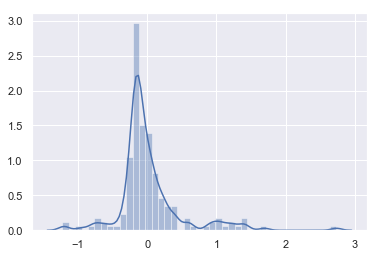

In [156]:
sns.distplot(y_test-predict)

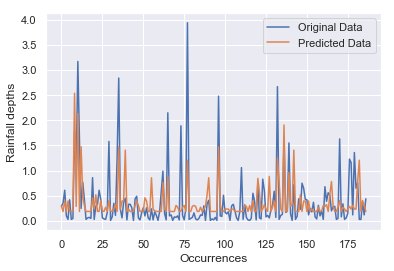

In [157]:
plt.plot(y_test,label="Original Data")
plt.plot(predict,label="Predicted Data")
    
plt.legend(loc='best')
plt.ylabel('Rainfall depths')
plt.xlabel('Occurrences')
#plt.title('Rain rate plot')
plt.savefig('KNNplot526.eps')